In [1]:
import cv2 as cv
import pickle
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
from matplotlib import pyplot as plt
InteractiveShell.ast_node_interactivity = "all"

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
d = unpickle('../data/data_batch_1')

In [4]:
s_visited = [0] * 10
pic_array = []
total = 0
for index, labels in enumerate(d[b'labels']):
    if s_visited[labels] == 0:
        pic_array.append(d[b'data'][index].reshape(3, 32, 32))
        total += 1
        s_visited[labels] = 1
        if total >= 10:
            break

In [5]:
len(pic_array)

10

In [10]:
def show_pic(img, rank):
#     plt.figure()
#     f, axarr = plt.subplots(1, 3, figsize=(15, 15)) 
#     axarr[0].imshow(img[0], cmap='gray', vmin=0, vmax=255)
#     axarr[1].imshow(img[1], cmap='gray', vmin=0, vmax=255)
#     axarr[2].imshow(img[2], cmap='gray', vmin=0, vmax=255)
#     plt.show()

#     img_trans = img.transpose(1, 2, 0)
#     plt.imshow(img_trans)
#     plt.show()

    img_trans = img.transpose(1, 2, 0)
    
    avg_blur = cv.blur(img_trans,(5, 5))
    plt.figure()
    f, axarr = plt.subplots(1, 2, figsize=(8, 8)) 
    axarr[0].imshow(img_trans)
    axarr[1].imshow(avg_blur)
    plt.show()
    
    Gaus_blur1 = cv.GaussianBlur(img_trans,(5, 5), 1)
    Gaus_blur2 = cv.GaussianBlur(img_trans,(5, 5), 5)
    Gaus_blur3 = cv.GaussianBlur(img_trans,(5, 5), 10)
    Gaus_blur4 = cv.GaussianBlur(img_trans,(5, 5), 50)
    Gaus_blur5 = cv.GaussianBlur(img_trans,(5, 5), 100)

    plt.figure()
    f, axarr = plt.subplots(2, 3, figsize=(13, 13))
    axarr[0][0].imshow(img_trans)
    axarr[0][1].imshow(Gaus_blur1)
    axarr[0][2].imshow(Gaus_blur2)
    axarr[1][0].imshow(Gaus_blur3)
    axarr[1][1].imshow(Gaus_blur4)
    axarr[1][2].imshow(Gaus_blur5)

    plt.show()
    
    median = cv.medianBlur(img_trans, 5)
    plt.figure()
    f, axarr = plt.subplots(1, 2, figsize=(8, 8)) 
    axarr[0].imshow(img_trans)
    axarr[1].imshow(median)
    plt.show()
    
    cv.imwrite('../data/HW1/problem1_results/{}_img.jpg'.format(rank), cv.cvtColor(img_trans, cv.COLOR_RGB2BGR))
    cv.imwrite('../data/HW1/problem1_results/{}_avg.jpg'.format(rank), cv.cvtColor(avg_blur, cv.COLOR_RGB2BGR))
    cv.imwrite('../data/HW1/problem1_results/{}_Gaus_blur1.jpg'.format(rank), cv.cvtColor(Gaus_blur1, cv.COLOR_RGB2BGR))
    cv.imwrite('../data/HW1/problem1_results/{}_Gaus_blur5.jpg'.format(rank), cv.cvtColor(Gaus_blur2, cv.COLOR_RGB2BGR))
    cv.imwrite('../data/HW1/problem1_results/{}_Gaus_blur10.jpg'.format(rank), cv.cvtColor(Gaus_blur3, cv.COLOR_RGB2BGR))
    cv.imwrite('../data/HW1/problem1_results/{}_Gaus_blur50.jpg'.format(rank), cv.cvtColor(Gaus_blur4, cv.COLOR_RGB2BGR))
    cv.imwrite('../data/HW1/problem1_results/{}_Gaus_blur100.jpg'.format(rank), cv.cvtColor(Gaus_blur5, cv.COLOR_RGB2BGR))
    cv.imwrite('../data/HW1/problem1_results/{}_median.jpg'.format(rank), cv.cvtColor(median, cv.COLOR_RGB2BGR))

<Figure size 432x288 with 0 Axes>

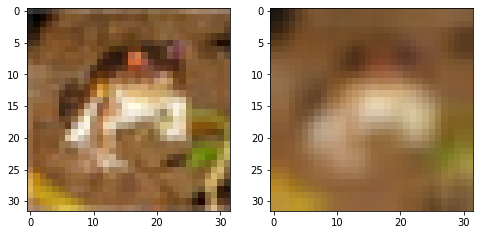

<Figure size 432x288 with 0 Axes>

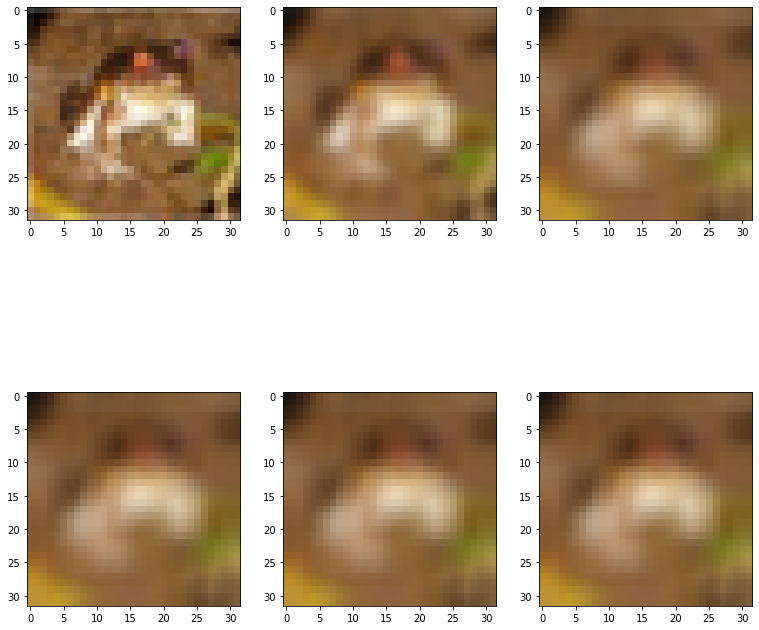

<Figure size 432x288 with 0 Axes>

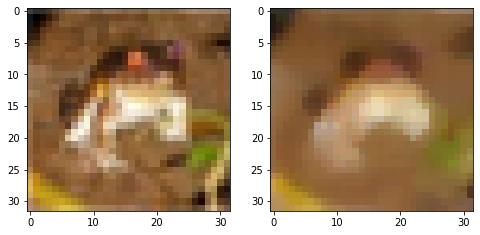

<Figure size 432x288 with 0 Axes>

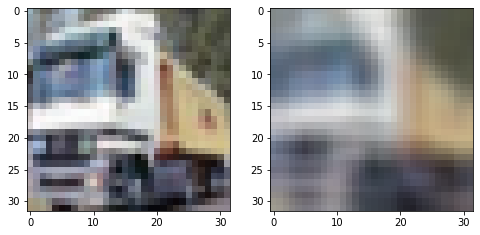

<Figure size 432x288 with 0 Axes>

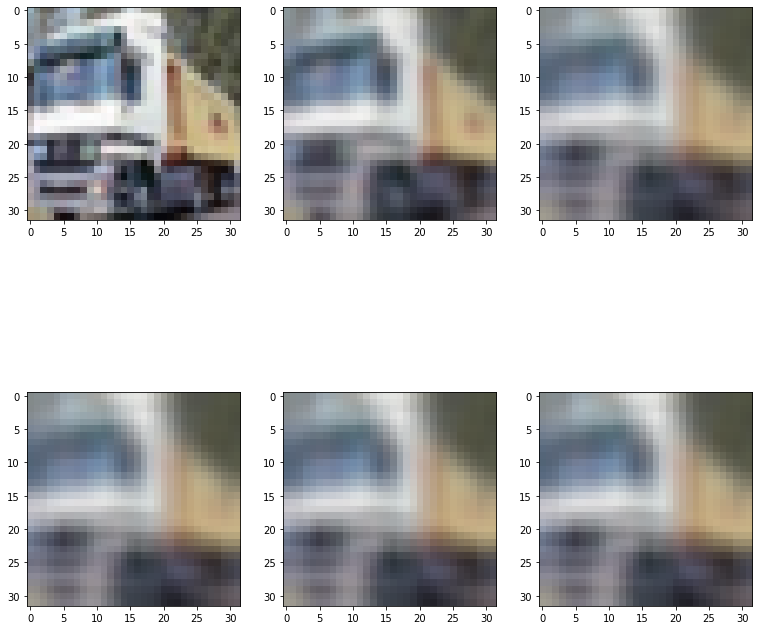

<Figure size 432x288 with 0 Axes>

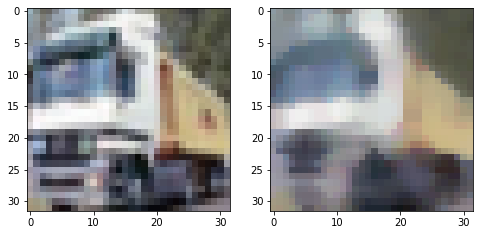

<Figure size 432x288 with 0 Axes>

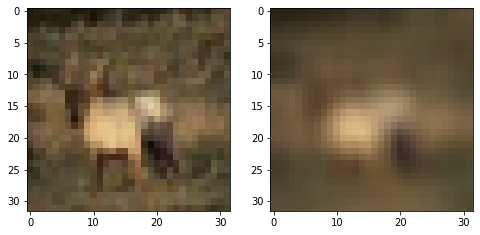

<Figure size 432x288 with 0 Axes>

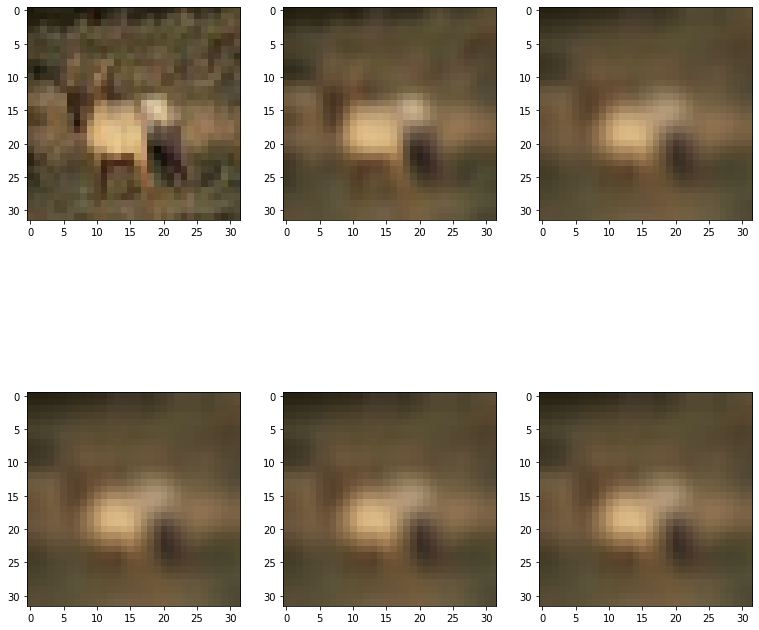

<Figure size 432x288 with 0 Axes>

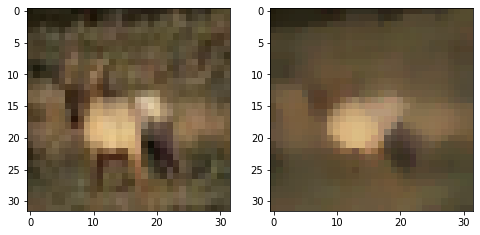

<Figure size 432x288 with 0 Axes>

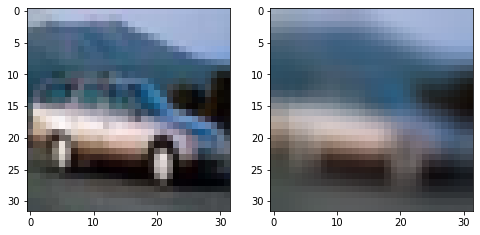

<Figure size 432x288 with 0 Axes>

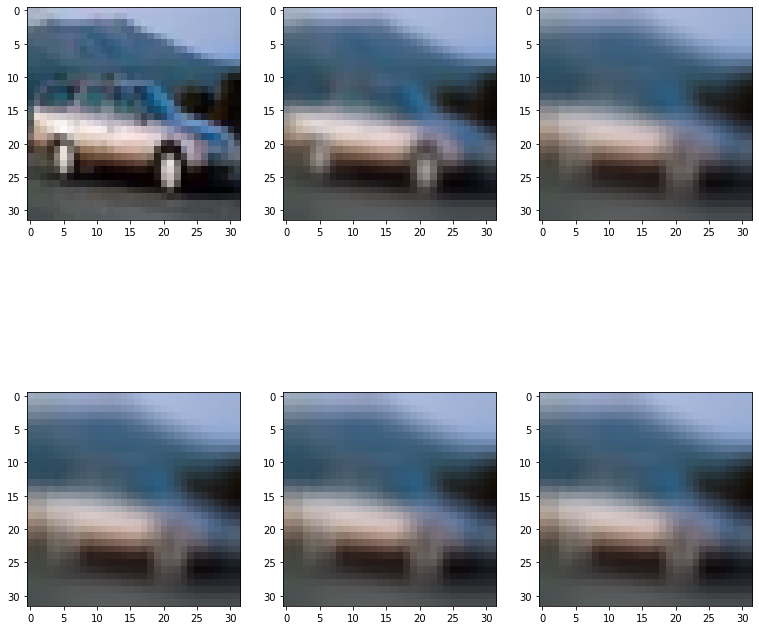

<Figure size 432x288 with 0 Axes>

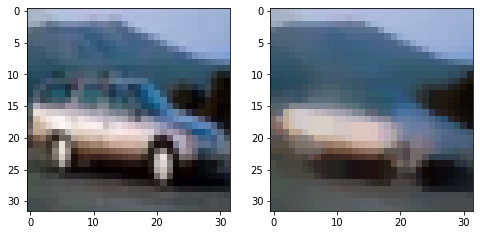

<Figure size 432x288 with 0 Axes>

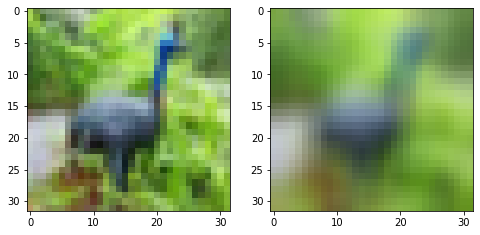

<Figure size 432x288 with 0 Axes>

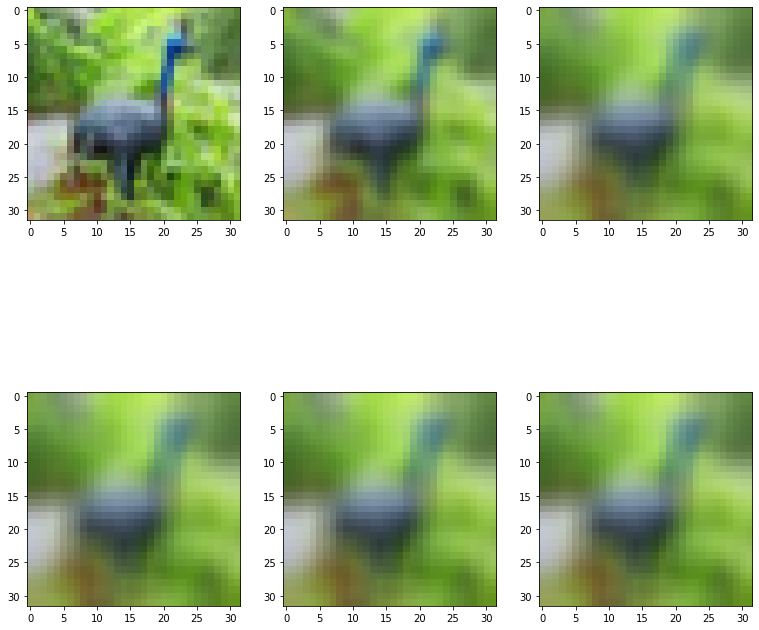

<Figure size 432x288 with 0 Axes>

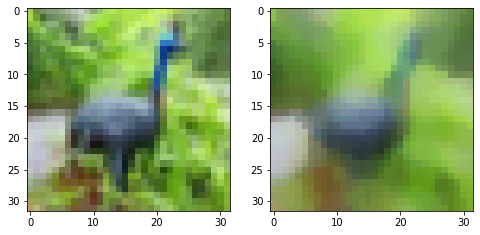

<Figure size 432x288 with 0 Axes>

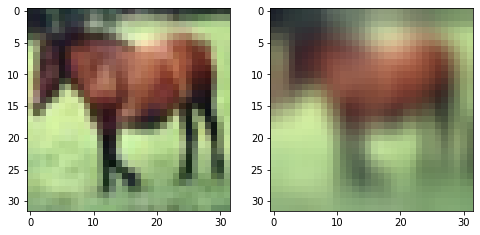

<Figure size 432x288 with 0 Axes>

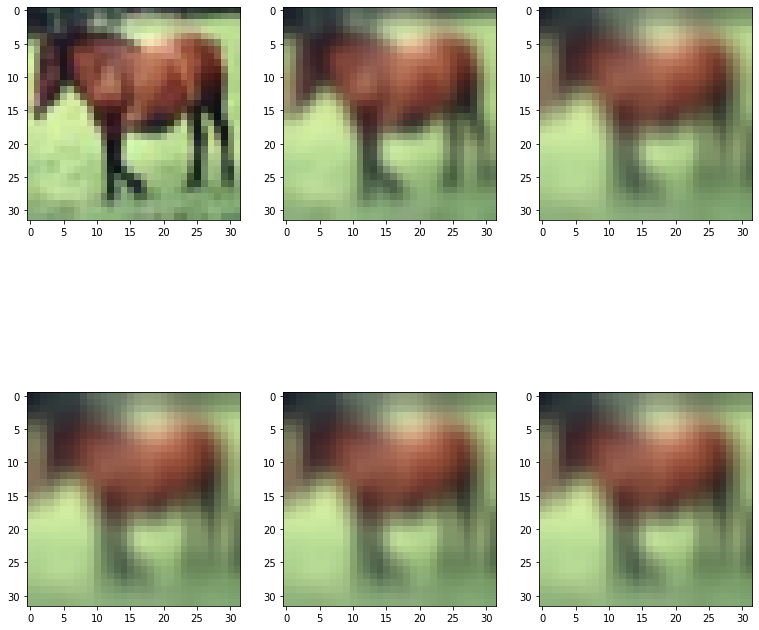

<Figure size 432x288 with 0 Axes>

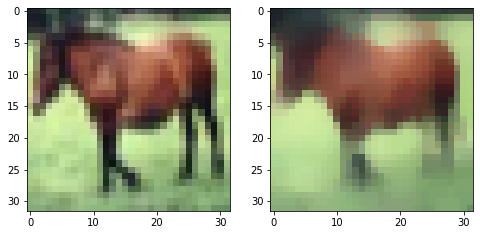

<Figure size 432x288 with 0 Axes>

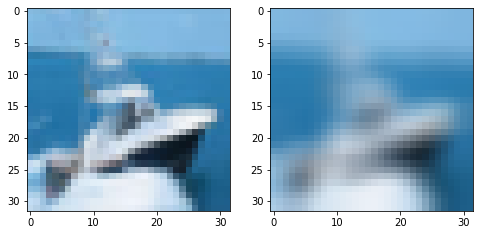

<Figure size 432x288 with 0 Axes>

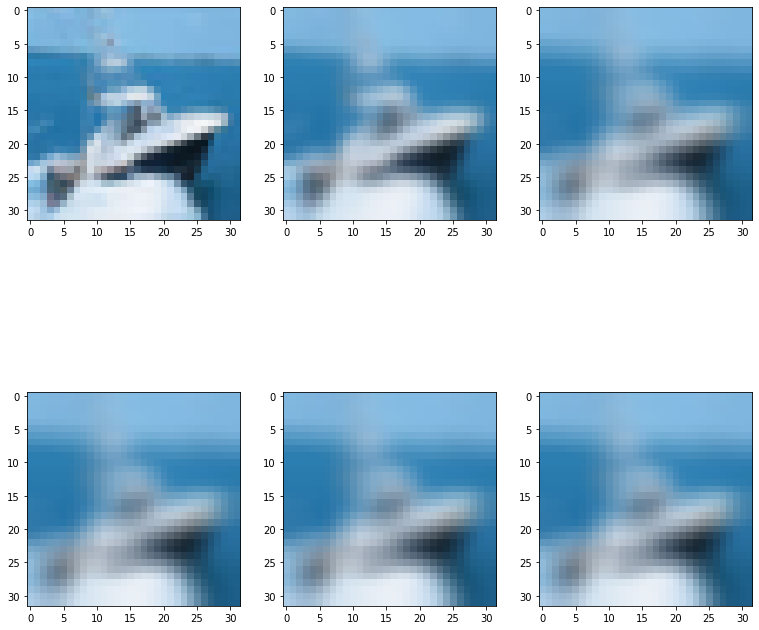

<Figure size 432x288 with 0 Axes>

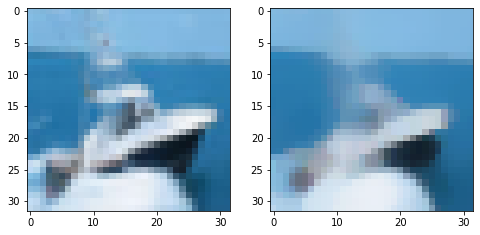

<Figure size 432x288 with 0 Axes>

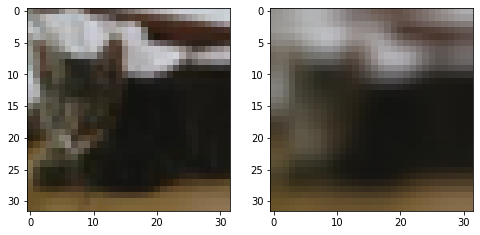

<Figure size 432x288 with 0 Axes>

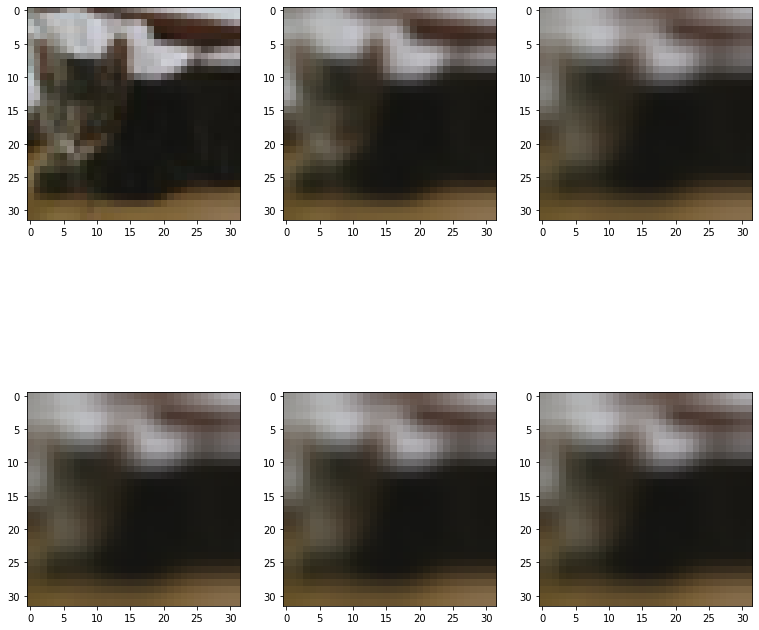

<Figure size 432x288 with 0 Axes>

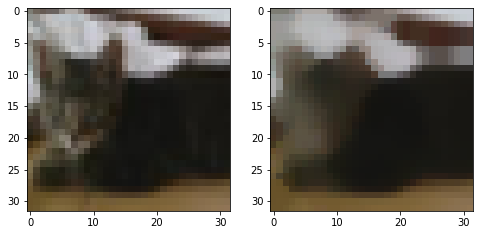

<Figure size 432x288 with 0 Axes>

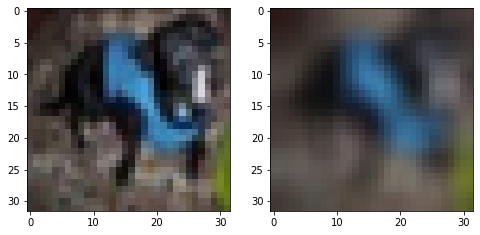

<Figure size 432x288 with 0 Axes>

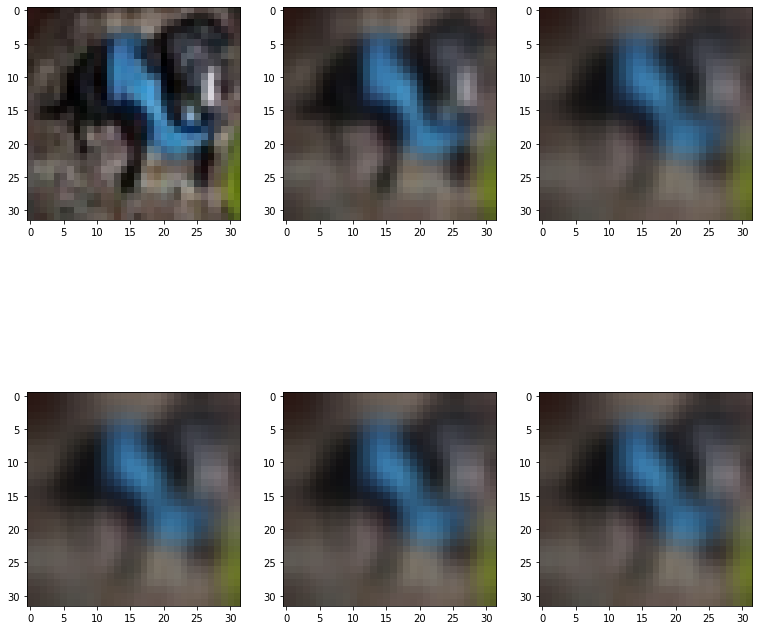

<Figure size 432x288 with 0 Axes>

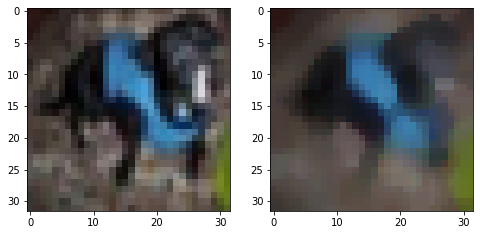

<Figure size 432x288 with 0 Axes>

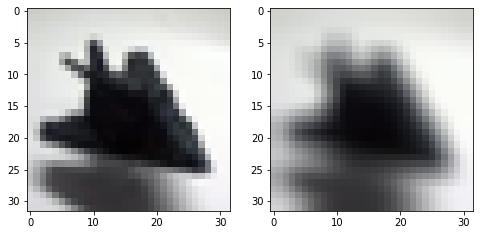

<Figure size 432x288 with 0 Axes>

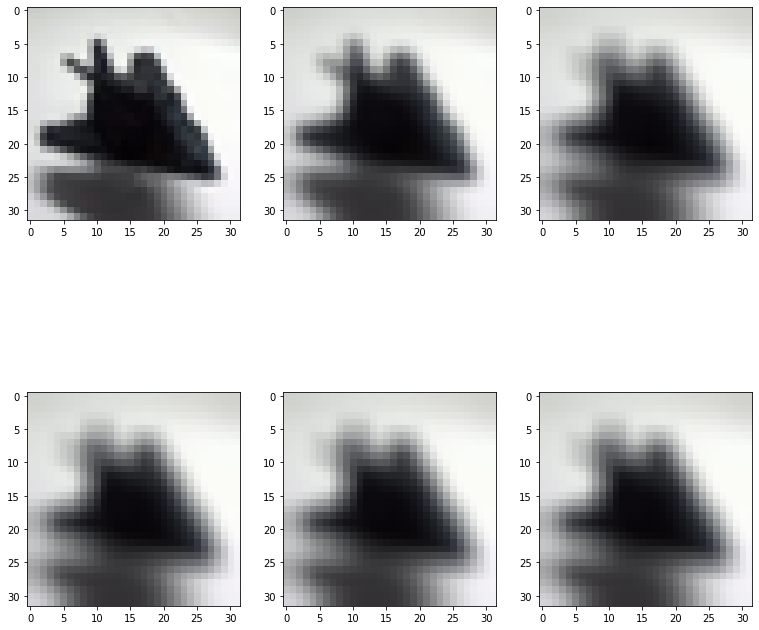

<Figure size 432x288 with 0 Axes>

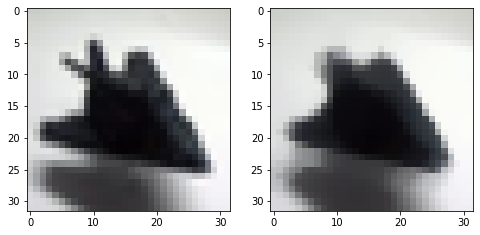

In [11]:
for index, img in enumerate(pic_array):
    show_pic(img, index)